### We will be using dual mover average crossover and it occures when a short term average cross is a long term average cross.This is used to identify that the momentum is shifting ih the term of short term average. And a BUY signal is generated when the short term average crosses the long term average and rises above it. while a SELL signal is generated when the short term average  crosses long term average and falling below it.

## Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
plt.style.use('fivethirtyeight')

## Getting the Data

In [50]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (2).csv


In [51]:
#storing the data
TSLA=pd.read_csv('TSLA.csv')
TSLA.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


<function matplotlib.pyplot.show>

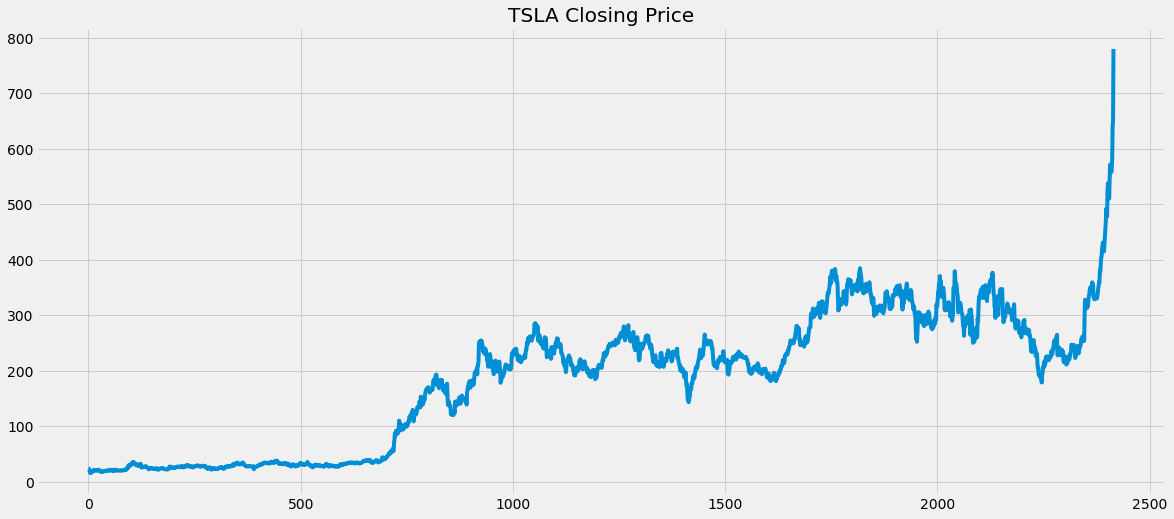

In [52]:
plt.figure(figsize=(18,8))
plt.plot(TSLA['Adj Close'], label='TSLA')
plt.title("TSLA Closing Price")
plt.show

In [0]:
from datetime import datetime
from pandas_datareader import data as web
check = web.DataReader('TSLA',  data_source='yahoo', start = ('2010-06-29'), end=('2020-05-03') )['Adj Close']

<function matplotlib.pyplot.show>

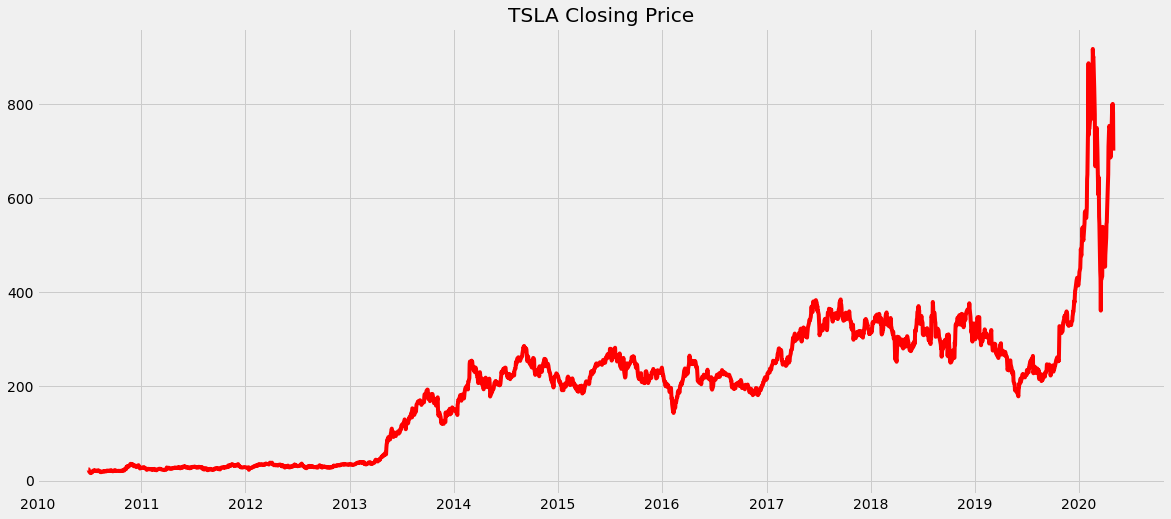

In [54]:
plt.figure(figsize=(18,8))
plt.plot(check, label='TSLA',color='r')
plt.title("TSLA Closing Price")
plt.show

Create a simpile moving averafe with 30 day window

In [55]:
#In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.
#It is also called a moving mean or rolling mean and is a type of finite impulse response filter. Variations include: simple, and cumulative, or weighted forms
sma30=pd.DataFrame()
sma30['Adj Close']=TSLA['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2411,469.665002
2412,477.085002
2413,485.728668
2414,494.781335


In [56]:
#create a simple moving 100 day average
sma100=pd.DataFrame()
sma100['Adj Close']=TSLA['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2411,343.527601
2412,347.041701
2413,351.175301
2414,355.363101


<function matplotlib.pyplot.show>

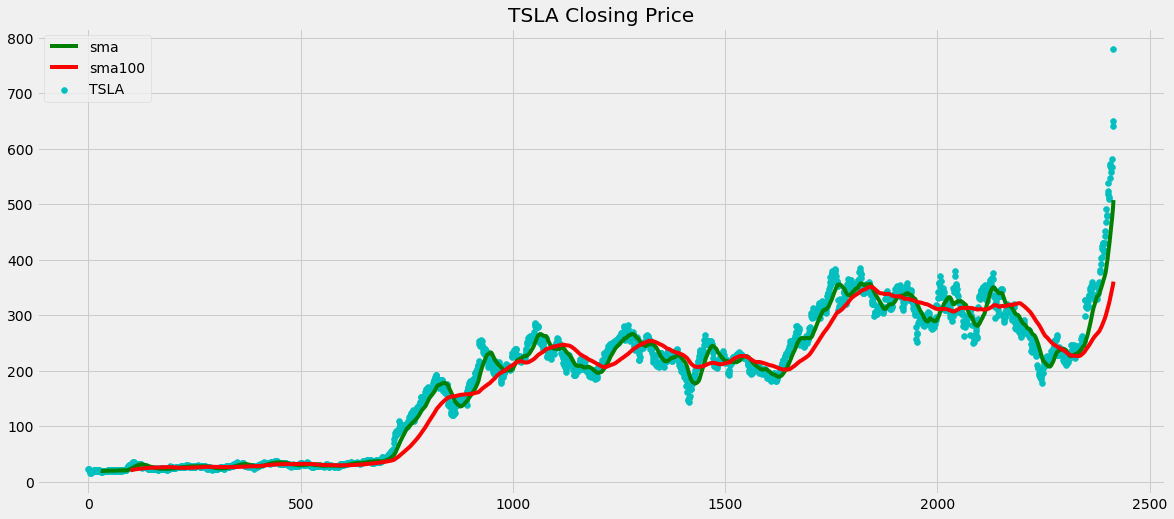

In [70]:
plt.figure(figsize=(18,8))
plt.scatter(TSLA.index,TSLA['Adj Close'], label='TSLA', color= 'c')
plt.plot(sma30['Adj Close'],label='sma',color='g')
plt.plot(sma100['Adj Close'],label='sma100',color='r')
plt.title("TSLA Closing Price")
plt.legend(loc='upper left')
plt.show

In red we have the 30 day average 

In yellow we have 100 day average 

### OUR STRATEGY IS THAT ANYTIME THE 30 DAY AVERAGE RETURNS PASSES ABOVE THE 100 DAY AVERAGE RETURNS WE WILL **BUY**(as sma30 = sma100) AND AFTER THE 30 DAY AVEREAGE RETURNS FALL BELOW THE 100 DAY AVERAGE RETURNS(as sma30 = sma100) WE HAVE TO **SELL**...

In [58]:
#Creating a new data frame to store all the data
data=pd.DataFrame()
data['TSLA']=TSLA['Adj Close']
data['sma30']=sma30['Adj Close']
data['sma100']=sma100['Adj Close']
data

,TSLA,sma30,sma100
0,23.889999,NaN,NaN
1,23.830000,NaN,NaN
2,21.959999,NaN,NaN
3,19.200001,NaN,NaN
4,16.110001,NaN,NaN
...,...,...,...
2411,566.900024,469.665002,343.527601
2412,580.989990,477.085002,347.041701
2413,640.809998,485.728668,351.175301
2414,650.570007,494.781335,355.363101


In [0]:
#function that will tell us whrn to buy or sell the stock
def buysell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  #flag will tell us when the two moving averages crossed
  flag = -1
  for i in range (len(data)):
    if data['sma30'][i]>data['sma100'][i]:
      if flag != 1:
        #now we want the signal to buy
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    elif data['sma30'][i]<data['sma100'][i]:     

      if flag != 0:
        #now we want the signal to sell
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['TSLA'][i])
        flag=0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    

    else:
       sigPriceBuy.append(np.nan)
       sigPriceSell.append(np.nan)

      
  return (sigPriceBuy,sigPriceSell)

Storing the buying and selling of data to 1 variable

In [0]:
buy_sell = buysell(data)
data['Buy_at']= buy_sell[0]
data['Sell_at']= buy_sell[1]

In [133]:
data

,TSLA,sma30,sma100,BUY at,Sell at,Buy_at,Sell_at
0,23.889999,NaN,NaN,NaN,NaN,NaN,NaN
1,23.830000,NaN,NaN,NaN,NaN,NaN,NaN
2,21.959999,NaN,NaN,NaN,NaN,NaN,NaN
3,19.200001,NaN,NaN,NaN,NaN,NaN,NaN
4,16.110001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2411,566.900024,469.665002,343.527601,NaN,NaN,NaN,NaN
2412,580.989990,477.085002,347.041701,NaN,NaN,NaN,NaN
2413,640.809998,485.728668,351.175301,NaN,NaN,NaN,NaN
2414,650.570007,494.781335,355.363101,NaN,NaN,NaN,NaN


# **Visualizing The Strategy**

<function matplotlib.pyplot.show>

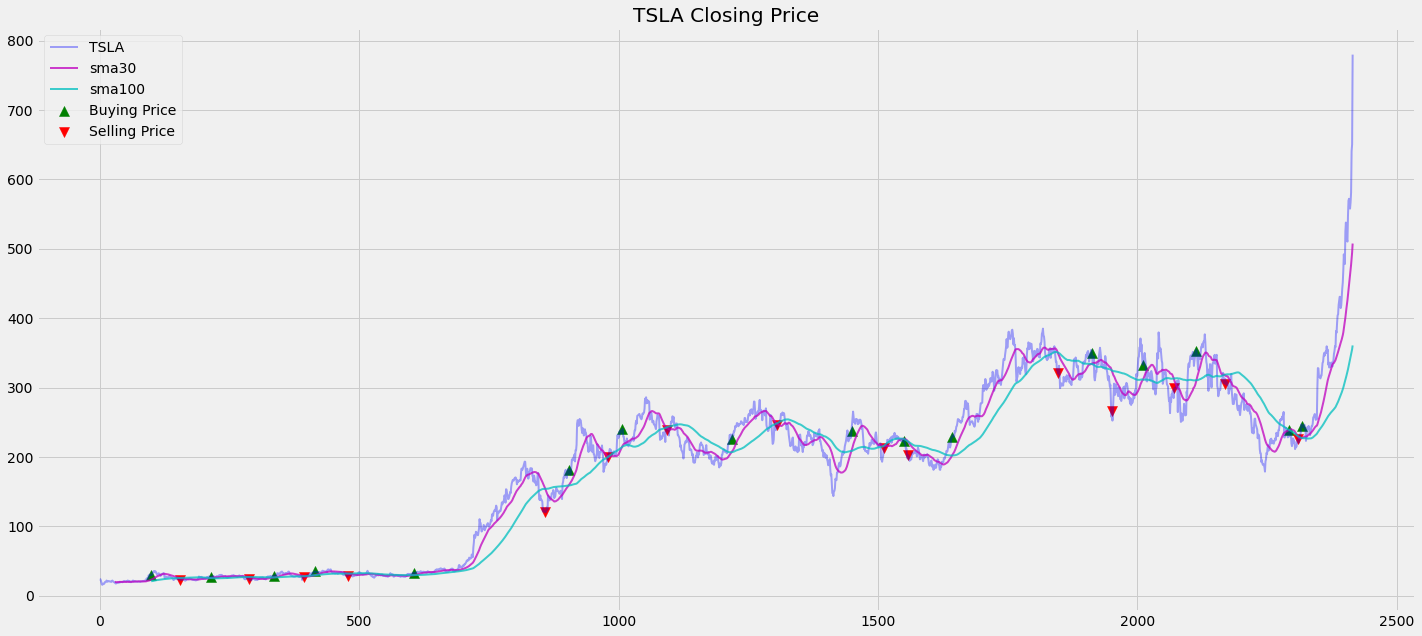

In [138]:
plt.figure(figsize=(22,10))
plt.scatter(data.index,data['Buy_at'], label='Buying Price',marker="^", color= 'g', s=100)
plt.scatter(data.index,data['Sell_at'], label='Selling Price',marker="v", color= 'r',s=100)
plt.plot(data['TSLA'],label='TSLA',color='b',linewidth= '2', alpha=0.35)
plt.plot(data['sma30'],label='sma30',color='m',linewidth= '2', alpha=0.75)
plt.plot(data['sma100'],label='sma100',color='c',linewidth= '2', alpha=0.75)
plt.title("TSLA Closing Price")
plt.legend(loc='upper left')
plt.show